<a href="https://colab.research.google.com/github/Ezramwangi/Brain-tumor-detection-system/blob/main/Another.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf


In [ ]:
x_train = []
y_train = []

image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/kaggle/Training', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.resize(img, (image_size, image_size))
    x_train.append(img)
    y_train.append(i)

for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/kaggle/Testing', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.resize(img, (image_size, image_size))
    x_train.append(img)
    y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

**Working on the dataset**

In [ ]:
# x_train = []
# y_train = []

# image_size = 150
# labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
# for i in labels:
#   folder_path = os.path.join('/content/drive/MyDrive/kaggle/Training', i)
#   for j in os.listdir(folder_path):
#     img = cv2.imread(os.path.join(folder_path, j))
#     img = cv2.resize(img, (image_size, image_size))
#     x_train.append(img)
#     y_train.append(i)

# for i in labels:
#   folder_path = os.path.join('/content/drive/MyDrive/kaggle/Testing', i)
#   for j in os.listdir(folder_path):
#     img = cv2.imread(os.path.join(folder_path, j))
#     img = cv2.resize(img, (image_size, image_size))
#     x_train.append(img)
#     y_train.append(i)

# x_train = np.array(x_train)
# y_train = np.array(y_train)

# print(i)

pituitary_tumor


In [ ]:
print(labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state=101)
print(x_train.shape)
print(y_train.shape)

# print(y_train)

(3264, 150, 150, 3)
(3264,)


**The train and test dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

**convolutional neural network**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))


In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (3,3), input_shape =(64, 64, 3) ))
# model.add(Conv2D(activation='relu'))
# model.add(MaxPooling2D(pool_size= (2, 2)))

# model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform' ))
# model.add(Activation=('relu'))
# model.add(MaxPooling2D(pool_size= (2, 2)))

# model.add(Conv2D(64, (3,3), kernel_initializer= 'he_uniform' ))
# model.add(Activation=('relu'))
# model.add(MaxPooling2D(pool_size= (2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation=('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation=('sigmoid'))

# model.compile(loss = 'binary_crossentropy', optimizer = ('Adam'), metrics = ['accuracy'])

# model.fit(x_train, y_train, batch_size = 16,
#           epochs = 29, validation_data=(x_test, y_test))

# # model.save('Brain_tumor_modelEpochs10.keras')

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 13s 103ms/step - loss: 1.9377 - accuracy: 0.3068 - val_loss: 1.2368 - val_accuracy: 0.4524
Epoch 2/10
83/83 [==============================] - 8s 100ms/step - loss: 1.1027 - accuracy: 0.5255 - val_loss: 0.9898 - val_accuracy: 0.5680
Epoch 3/10
83/83 [==============================] - 8s 98ms/step - loss: 0.9861 - accuracy: 0.5789 - val_loss: 0.9648 - val_accuracy: 0.5408
Epoch 4/10
83/83 [==============================] - 8s 96ms/step - loss: 0.8524 - accuracy: 0.6235 - val_loss: 0.7961 - val_accuracy: 0.6531
Epoch 5/10
83/83 [==============================] - 8s 96ms/step - loss: 0.7494 - accuracy: 0.6803 - val_loss: 0.8188 - val_accuracy: 0.6531
Epoch 6/10
83/83 [==============================] - 8s 96ms/step - loss: 0.6375 - accuracy: 0.7276 - val_loss: 0.8437 - val_accuracy: 0.6429
Epoch 7/10
83/83 [==============================] - 8s 95ms/step - loss: 0.5948 - accuracy: 0.7647 - val_loss: 0.5485 - val_accuracy: 0.7789
Epoch 8/10

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


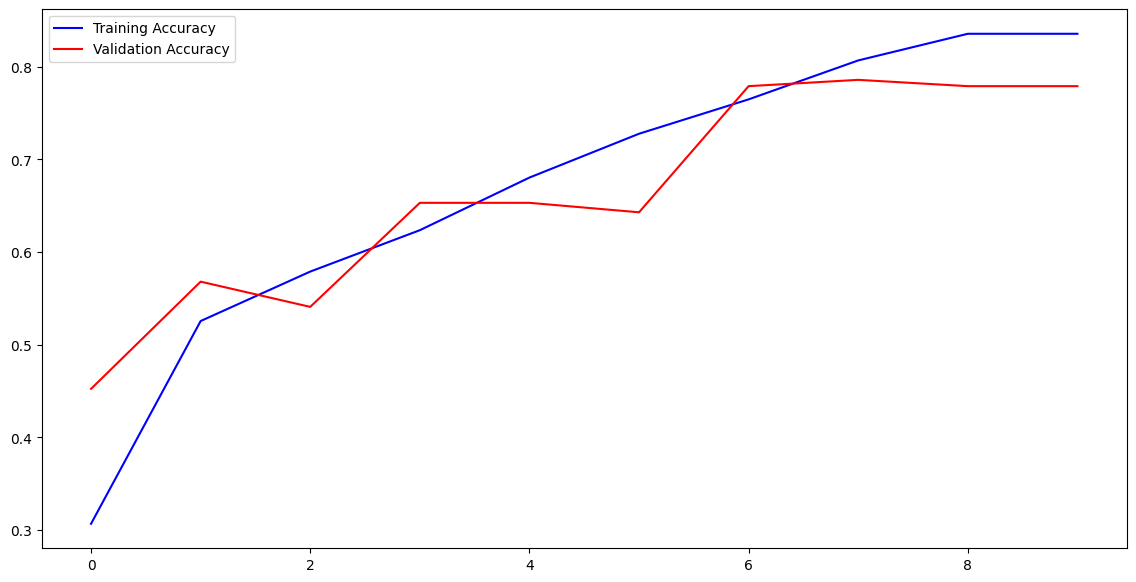

In [ ]:
model.save('brain_tumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(loss))
# fig = plt.figure(figsize = (14,7))
# plt.plot(epochs, loss, 'b', label = "Training Loss")
# plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
# plt.legend(loc = 'upper left')
# plt.show()

fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'b', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

**Prediction**


In [ ]:
img = cv2.imread('/content/drive/MyDrive/kaggle/Testing/download.jpeg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

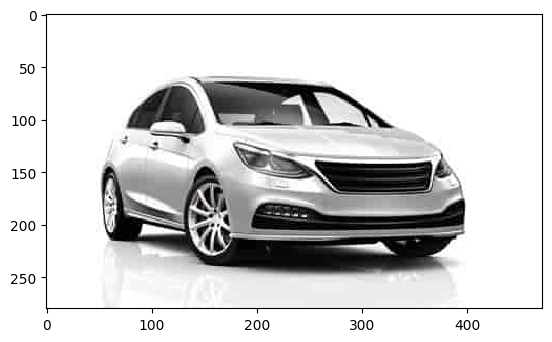

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/kaggle/Testing/download.jpeg')
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 19ms/step


2